# Project

## Project Description
- Imitate the visual style of "cel shading" on images of people or things
    - Use Segmentation to detect objects
    - Use Edge Detection to find lines within said objects
    - Draw over the detected lines with thick, black lines to outline objects
    - Blur objects with a small kernel to artificially smooth and lower resolution of the objects
    - Further segment objects based on detected lines and contours to get object segments
    - Normalize light within segments by averaging the V-value after converting to HSV

## The Image

Random dude in a field

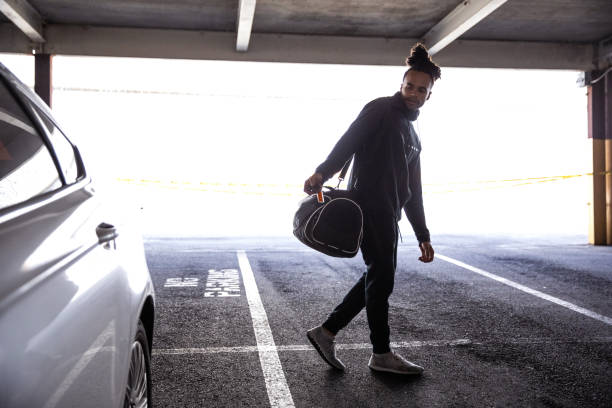

In [1]:
import torch
from torchvision import transforms
from PIL import Image, ImageChops
import numpy as np
import math
from segmentation import get_mask, blur_object_pixels
from normalize_HSV import normalize_brightness, RGB_to_HSV, HSV_to_RGB, apply_mask

filename = 'data/image2.jpg'
input_image = Image.open(filename)
input_image = input_image.convert("RGB")
display(input_image)

## Smoothing objects with small kernel

#### Borrowing code from Practical Six for smoothing objects

In [5]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', weights=True)
input_image_blurred = blur_object_pixels(model, input_image, ['person'], sigma=5, show_object_list=False, concat=False, scale=1)

Using cache found in C:\Users\henky/.cache\torch\hub\pytorch_vision_v0.10.0
C:\Users\henky\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Segmentation and Object Detection

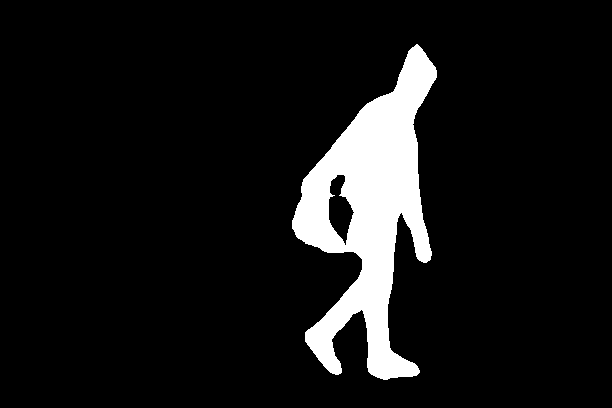

In [7]:
person_mask = get_mask(model, input_image_blurred, ['person'], sigma=5, show_object_list=False, concat=True, scale=1)
display(person_mask)



## Normalize lighting via HSV-values

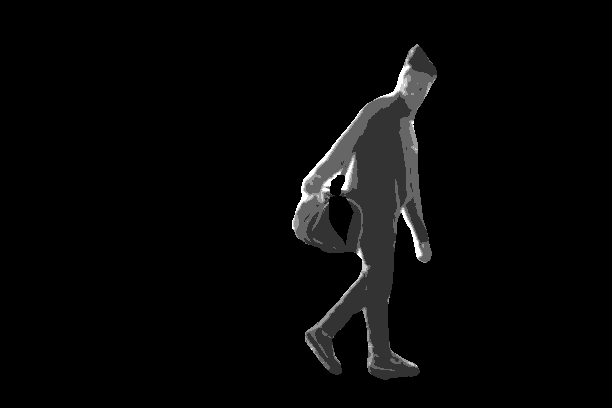

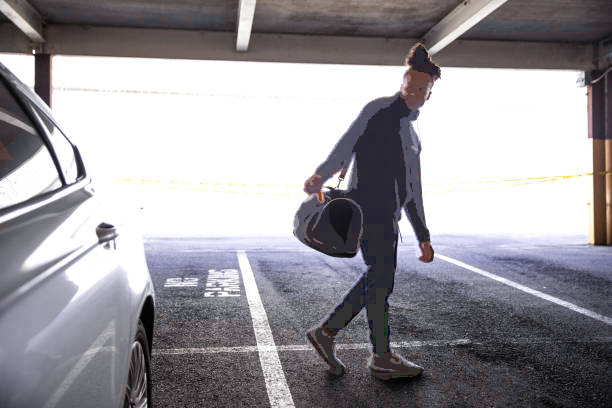

In [8]:
ms = normalize_brightness(input_image_blurred, 6, person_mask)
img = ms["all"]
display(img)
masked = apply_mask(input_image, img)
display(masked)

## Edge Detection

- Canny edges from openCV

## Drawing over detected edges

#### Running the code

In [4]:
from edge_detection import imfilter, gaussian_kernel, np2img, detect_edges
base = np.array(img)
blackimg = np2img(np.zeros(base.shape))
for key in ms.keys():
    if key!= "all":
        layer = ms[key]
        edges = detect_edges(layer, 50)
        Image.composite(img, blackimg, edges)
        #display(np2img(edges))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Segment objects based on detected lines and contours